In [ ]:
#Assignment 1: 02805 Social graphs and interactions 
Group 65:
s226625 - Emma Rebner 

In [ ]:
#Assignment 1.1

In [ ]:
#===Exercises: Did you really read the text?===#

# 1) What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

ANSWER: 
Random networks fail as a model of real networks because they predict a narrow degree distribution, 
where all nodes have about the same number of links, whereas real networks show wide variability with both low-degree 
nodes and highly connected hubs.


In [ ]:
#===Exercises: Did you really read the text?===#

# 2) List the four regimes that characterize random networks as a function of.
    
ANSWER: 
The four regimes of random networks, as a function of the average degree ‹k›, are:
- Subcritical (‹k› < 1): The network is broken into many small clusters, with no giant component.
- Critical (‹k› = 1): A phase transition takes place; the largest cluster grows to about N^(2/3) but still represents only a small fraction of the network.
- Supercritical (‹k› > 1): A giant component forms and containing a finite share of the nodes, while smaller isolated clusters remain.
- Connected (‹k› ≳ lnN): The giant component includes almost all nodes, which makes the network fully connected


In [1]:
#=== Exercises: Did you really read the text?===#

# 3) According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) 
# that the degree-dependent clustering  decreases as a function of  in real-world networks?

ANSWER: 
The problem is that random networks predict clustering to be the same for all nodes, 
regardless of degree, whereas in real networks clustering decreases as degree increases. 
The missing degree–clustering relationship means random networks cannot reproduce the hierarchical and community structures 
that exist in real systems. For example, studies of the Internet, science collaboration networks, and protein interaction networks show that high-degree nodes (hubs) have much lower clustering
than low-degree nodes, a pattern completely absent in random networks.


SyntaxError: invalid character '–' (U+2013) (203455791.py, line 9)

In [11]:
#===Exercises: WS edition===#

# 1) Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each with average degree = 4, and rewiring probablity p =0,01 and 1.
# Calculate the average shortest path length <d> for each one.

import networkx as nx
import numpy as np

# Parameters
N = 500
k = 4
ps = [0, 0.1, 1]

for p in ps:
  G = nx.watts_strogatz_graph(N, k, p)
  avg_shortest_path = nx.average_shortest_path_length(G)
  print(f"p={p}: <d> = {avg_shortest_path:.3f}")


p=0: <d> = 62.876
p=0.1: <d> = 7.912
p=1: <d> = 4.762


In [ ]:
#===Exercises: WS edition===#
# 2) Describe what happens to the network when p=1 .

ANSWER:  
For p=1,the network becomes fully randomized, and the paths are even shorter (⟨d⟩≈4.8).
When p=1, all edges in the Watts–Strogatz model are rewired randomly, which destroys the regular lattice structure and produces a network that behaves like an Erdős–Rényi random graph. 
In this regime, the average shortest path length is very small, scaling on the order of log(N), 
while the clustering coefficient is low because local connections are no longer preserved. 


In [14]:
#===Exercises: WS edition===#

# 3) Generate a lot of networks with different values of p.
# You will notice that paths are short when p=0 is close to one and they are long when p. 
# What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

import networkx as nx
import numpy as np


# Parameters
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05,0.6, 0.1, 0.2, 1]

results = []

for p in p_values:
    path_lengths = []
    for _ in range(20):  
        G = nx.watts_strogatz_graph(N, k, p)
        avg_len = nx.average_shortest_path_length(G)
        path_lengths.append(avg_len)
    mean_d = np.mean(path_lengths)
    results.append((p, mean_d))
    print(f"p={p}: <d> ≈ {mean_d:.3f}")

# ANSWER:
# The results show that the average shortest path length decreases very rapidly as p increases from zero. By p≈0.05–0.1,
# the distances are already close to those observed in the fully randomized case (p=1), where ⟨d⟩ stabilizes around 4–5. Larger values of 
# p such as 0.6 or 1 do not change the distance significantly, since the network has reached the random-graph limit (⟨d⟩∼logN).

p=0: <d> ≈ 62.876
p=0.01: <d> ≈ 24.141
p=0.03: <d> ≈ 13.123
p=0.05: <d> ≈ 10.189
p=0.6: <d> ≈ 4.872
p=0.1: <d> ≈ 7.657
p=0.2: <d> ≈ 6.106
p=1: <d> ≈ 4.762


p=0: mean <d> ≈ 62.876, std ≈ 0.000
p=0.01: mean <d> ≈ 24.355, std ≈ 4.404
p=0.03: mean <d> ≈ 12.888, std ≈ 1.476
p=0.05: mean <d> ≈ 10.121, std ≈ 0.764
p=0.1: mean <d> ≈ 7.677, std ≈ 0.228
p=0.2: mean <d> ≈ 6.121, std ≈ 0.119


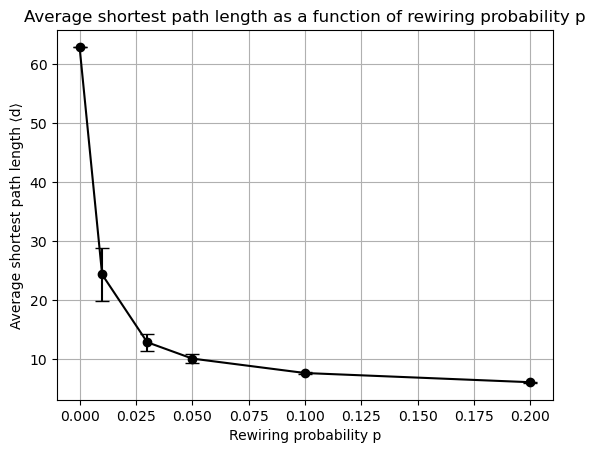

In [19]:
#===Exercises: WS edition===#
# 4) Generate 50 networks with N=500 nodes and average degree ⟨k⟩=4. For each value of p∈{0,0.01,0.03,0.05,0.1,0.2}, 
# Calculate the average of as well as the standard deviation over the 50 networks, to create a plot that shows how the
# path length decreases very quickly with only a little fraction of re-wiring. 

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_networks = 50

results = []

for p in p_values:
    d_values = []
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(N, k, p)
        avg_d = nx.average_shortest_path_length(G)
        d_values.append(avg_d)
    mean_d = np.mean(d_values)
    std_d = np.std(d_values)
    results.append((p, mean_d, std_d))
    print(f"p={p}: mean <d> ≈ {mean_d:.3f}, std ≈ {std_d:.3f}")

# Extract results
p_list = [r[0] for r in results]
mean_list = [r[1] for r in results]
std_list = [r[2] for r in results]

# Plot with errorbar
plt.errorbar(p_list, mean_list, yerr=std_list, fmt='o-', capsize=5, color='black', ecolor='black', markerfacecolor='black')
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.title("Average shortest path length as a function of rewiring probability p")
plt.grid(True)
plt.show()


In [ ]:
#===Exercises: WS edition===#
# 5) Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

The plot shows the average shortest path length ⟨d⟩ as a function of the rewiring probability p in the Watts–Strogatz model with 
N=500 nodes and average degree ⟨k⟩=4. For each value of p∈{0,0.01,0.03,0.05,0.1,0.2}, 50 independent network realizations were generated. 
The black circles indicate the mean value of ⟨d⟩, while the vertical error bars represent the standard deviation across the 50 networks.
The results show that in the regular lattice (p=0) the average path length is very large, but it decreases sharply as soon as a small fraction of edges are rewired 
(p=0.01–0.05). Beyond p≈0.1. The average path length is already close to the random-graph limit, and further rewiring does not reduce distances significantly.
This illustrates the small-world effect; only a small amount of randomness is required to drastically shorten global distances while maintaining some local clustering.

In [ ]:
#Assignment 1.1
# Part 2

In [ ]:
# Assignment 1.2 
# Part 2

# Assignment 1.2 
**Explain Your process in words**
* *Document how you crawled the network*: First some helper functions were defined, using material primarily the material from the course videos. A function get_url() that take sin a page title from the rockperformers list and returns the proper wikipedia URL. A function get_pages() that takes in a URL and retrieves the wiki text of the corresponding page. A function get_titles() that uses a regex to etxract all outgoing links from the text. First all the links from the "List of rock performers" page was extracted. Each performer's wikipedia page was saved locally in its own text file. Next a for loop was created over the titles from the rock performers list to open their saved wiki text. For each page a regex was used to collect outgoing links and filter them so only links that were present in rock performers list were kept. The number of words on each page was counted using by computing the length of the list of extracted words using the regex expression \b\w+\b to match whole words. 

* *Challenges*: A main challenge was working with the regex to properly extract performer links. Initially only ASCII characters was used, which showed very early to be inefficient due to a lot of titles containing special characters like "(bands)". Another challenge was handling text encoding issues when saving and reading wiki text locally. 

* *How LLMs was used*: LLMs helped debug and refine regex expression. Specifically instead of defining what should be present using ^ it was easier to define what shouldn't be inside the double brackets[[]] using [^]. LLms also assisted with encoding issues when reading and writing wiki pages, specifically this line was given to solve issues "title_encoded = quote(title.replace(" ", "_"))".

* *Would could be done different*: Instead of saving the entire wiki page the regex could be used to extract the links to avoid saving unnecessary text. The initial list of performers could also be used to extract all unique characters that are present in the titles to help define the regex expression and easier handle the special cases. 

In [14]:
# Loading the graph
import urllib.request
import networkx as nx
url = "https://raw.githubusercontent.com/Jerry-oops/Social-Graphs-and-Interactions---Assignment-1/main/rock_artists_network.gexf"
urllib.request.urlretrieve(url, "rock_artists_network.gexf")
G = nx.read_gexf("rock_artists_network.gexf")

In [15]:
# Exercise: Simple networks and statistics
# What is the number of nodes in the network ?
print(f'Number of nodes: {len(G.nodes)}')
# What is the number of links ?
print(f'Number of edges: {len(G.edges)}')

Number of nodes: 485
Number of edges: 7326


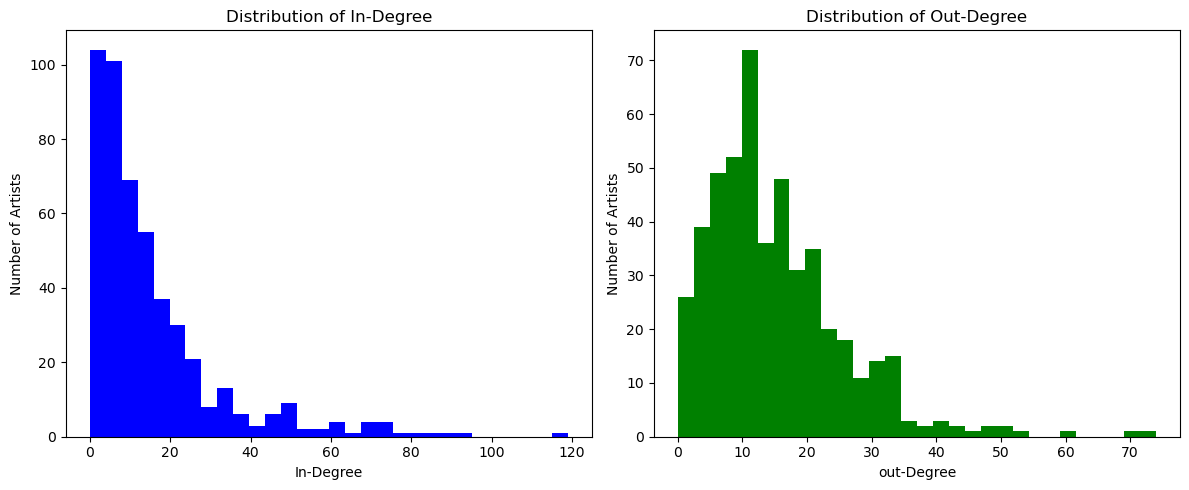

In [21]:
# Plotting the in degree distribution and out degree distribution side by side
import matplotlib.pyplot as plt
in_degrees  = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(12, 5))

# Plot in-degree distribution
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='blue')
plt.xlabel('In-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of In-Degree')

# Plot out-degree distribution
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=30, color='green')
plt.xlabel('out-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of Out-Degree')
plt.tight_layout()
plt.show()

In the left plot above one can observe the distribution of the in-degree values for different bands. In-degree is on x-axis so number of directed links coming in and the number artist that has the specific in degree number (within the bin of the histogram) on y-axis. It can be observed most artist have an in degree below 20 meaning most artist have fewer than 20 bands pointing to them on their wikiwebpages and few have above 40. On the right is the out-degree distribution it can be observed most artist point to less than 25 other rock bands. One of the main observations and difference between the two plots that few bands have a large in-degree value. This is properly due to the rich get richer effect. Bands like the Beatles or Led Zeppelin are some of the first major rock bands. These are the main sources of inspiration for next generation of bands that will refer to them. These resemble scale free networks

In [17]:
# Create a random graph
G_random = nx.erdos_renyi_graph(n=len(G.nodes), p=0.1, directed=True)
# Create a scale-free network
G_ba = nx.barabasi_albert_graph(n=100, m=2)
G_ba_directed = G_ba.to_directed()

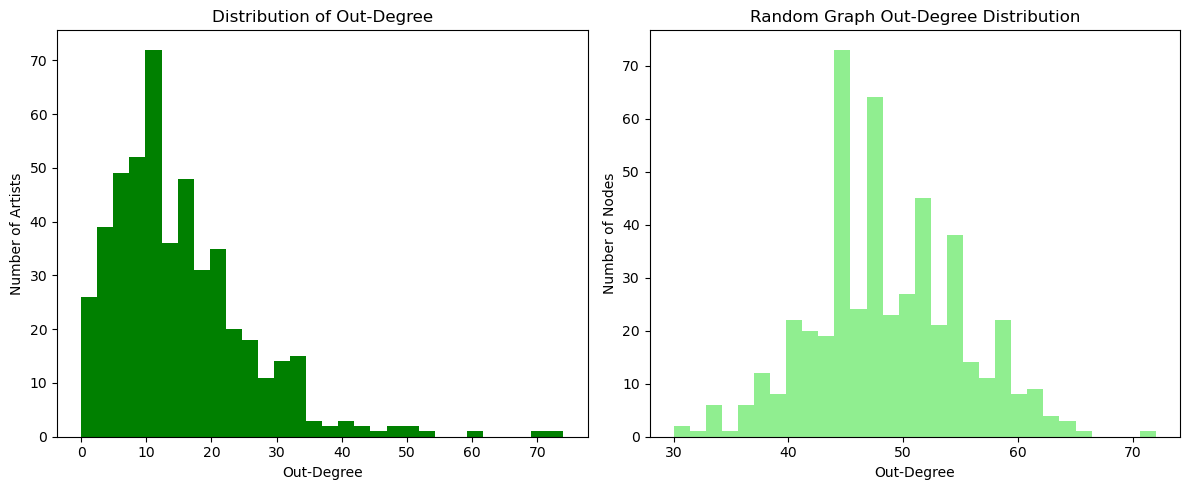

In [18]:
# Comparing outdegree distribution to a random graph
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 5))
# Plot out-degree distribution
plt.subplot(1, 2, 1)
plt.hist(out_degrees, bins=30, color='green')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of Out-Degree')
plt.tight_layout()

# Plot the random graph out degree distribution
random_out_degrees = [G_random.out_degree(n) for n in G_random.nodes()]
plt.subplot(1, 2, 2)
plt.hist(random_out_degrees, bins=30, color='lightgreen')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Nodes')
plt.title('Random Graph Out-Degree Distribution')
plt.tight_layout()
plt.show()

We see in the above plots the difference between a "real network" ( left) and "random network" ( right). The random network bollows a binomial distribution due to using an equal probability for all edges. 

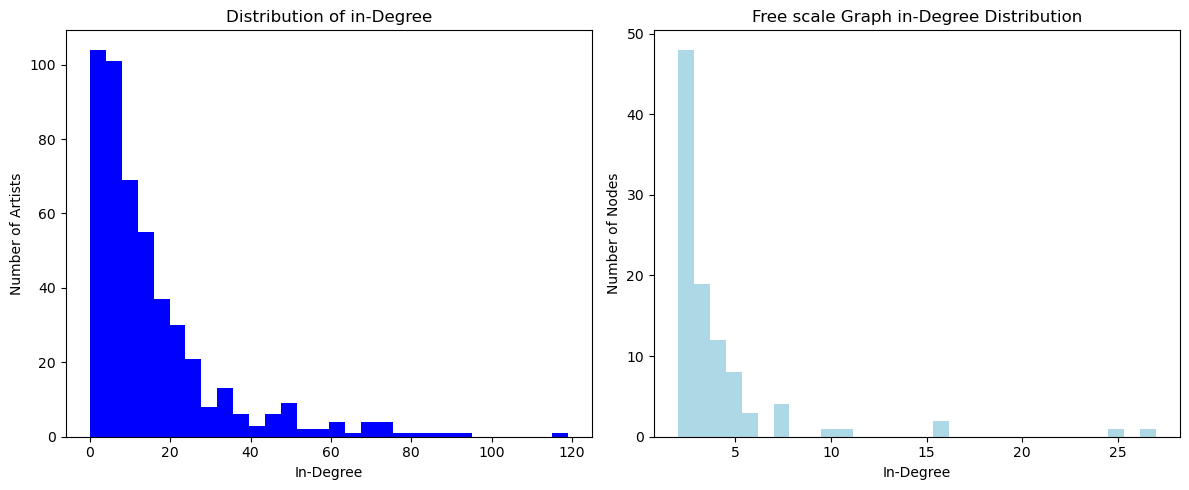

In [ ]:
# Comparing out degree distribution to a random graph
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 5))
# Plot out-degree distribution
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='blue')
plt.xlabel('In-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of in-Degree')
plt.tight_layout()

# Plot the random graph out degree distribution
ba_in_degrees = [G_ba_directed.in_degree(n) for n in G_ba_directed.nodes()]
plt.subplot(1, 2, 2)
plt.hist(ba_in_degrees, bins=30, color='lightblue')
plt.xlabel('In-Degree')
plt.ylabel('Number of Nodes')
plt.title('Free scale Graph in-Degree Distribution')
plt.tight_layout()
plt.show()

We see the distributions above are very similar indicating the rock artist network resembles a scale free network. Both have 

In [20]:
import pandas as pd
in_degrees = dict(G.in_degree)
df_in = pd.DataFrame(list(in_degrees.items()), columns=["Artist", "InDegree"])
df_sorted_in = df_in.sort_values(by="InDegree", ascending=False)
df_sorted_in.reset_index(drop=True, inplace=True)
print("Top 5 artists by In-Degree:")
print(df_sorted_in.head(5))

out_degrees = dict(G.out_degree)
df_out = pd.DataFrame(list(out_degrees.items()), columns=["Artist", "OutDegree"])
df_sorted_out = df_out.sort_values(by="OutDegree", ascending=False)
df_sorted_out.reset_index(drop=True, inplace=True)
print("\nTop 5 artists by Out-Degree:")
print(df_sorted_out.head(5))


Top 5 artists by In-Degree:
         Artist  InDegree
0  Led Zeppelin       119
1     Bob Dylan        95
2  Queen (band)        88
3     Metallica        85
4   David Bowie        83

Top 5 artists by Out-Degree:
            Artist  OutDegree
0  Alice in Chains         74
1      Deep Purple         71
2    Black Sabbath         60
3      Def Leppard         52
4      Bryan Adams         51


The band with most ingoing links is led zeppelin with 119 links. It makes sense they have a lot of other rock pages referring to them since
they are considered at least in rock culture as one of the biggest bands of all time. They were one of the first rock bands that took heavy influence from blues which is the precursor for a lot pop music through history. A lot of rock bands have probaly cited them as an influence.

Alice in chains has the most outgoing links with 74 links. The band has done a lot of collaborations and covers which could explain at least some proportion of the outgoing links.

C:\Users\lucas\AppData\Local\Temp\ipykernel_28564\1612839581.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="Word count")


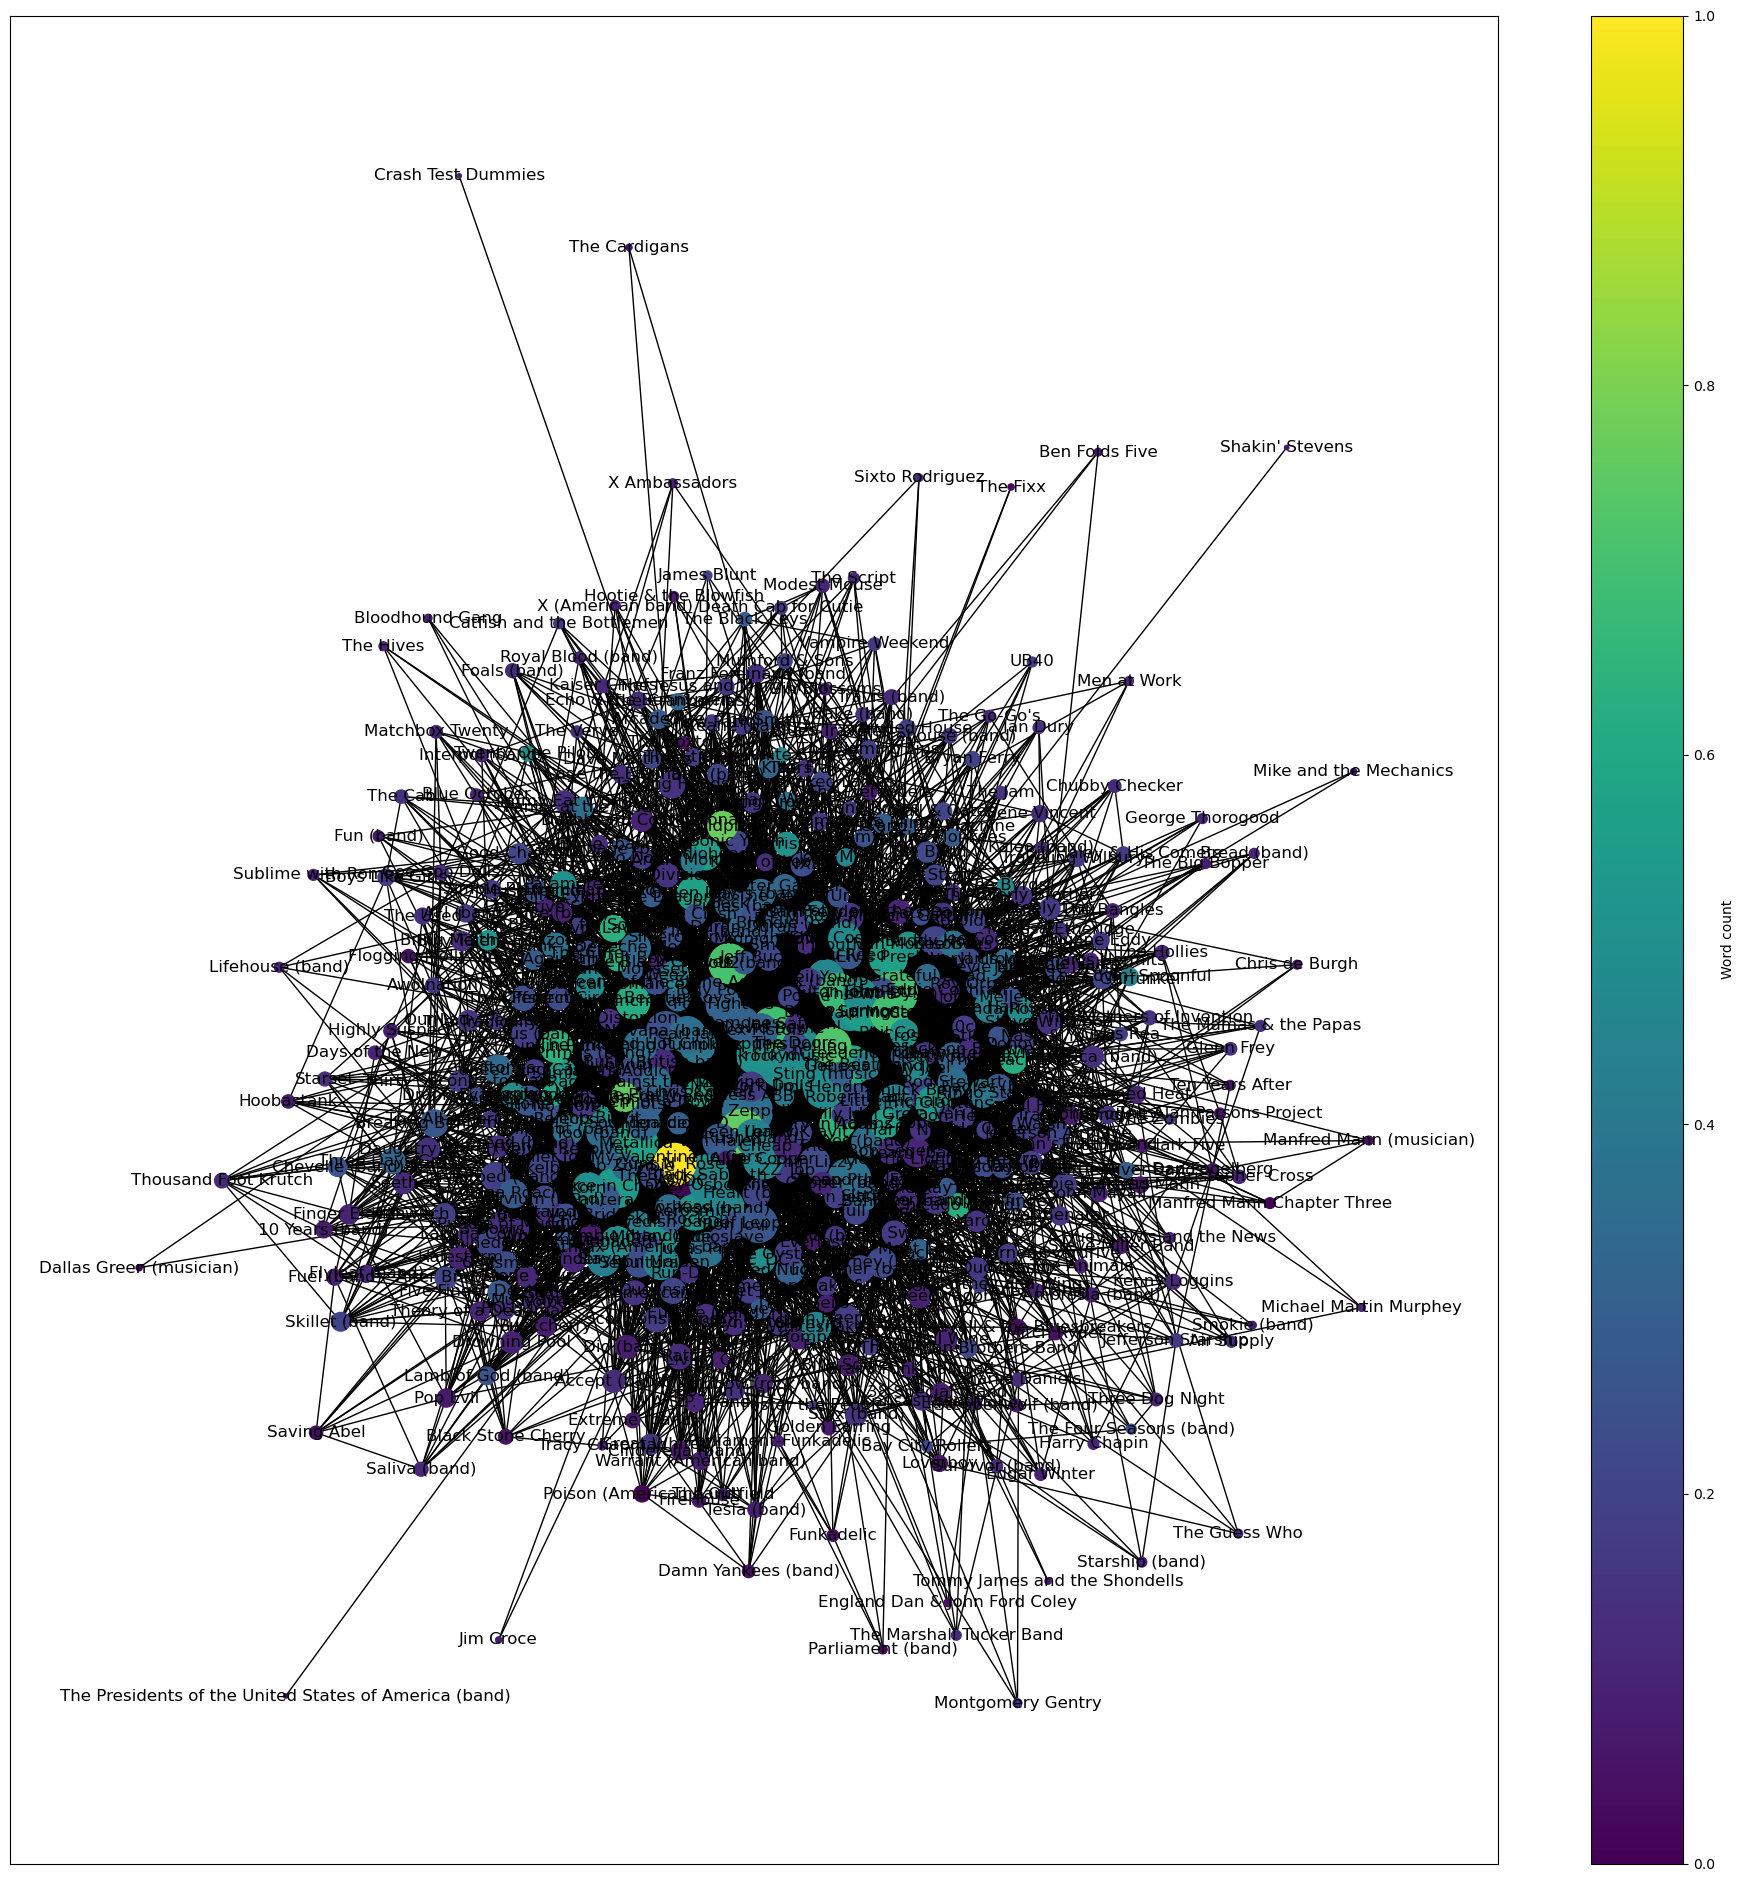

In [ ]:
# Exercise: Let's build a simple visualization of the network 

# Turning G into an undirected graph 
G_un = G.to_undirected()

# Setting a larger figure size for better visibility
plt.figure(figsize=(24, 24))

# Setting layout using spring_layout 
pos = nx.spring_layout(G_un, k=0.15, iterations=100)

# Drawing the edges
nx.draw_networkx_edges(G_un, pos)

# Drawing the labels
nx.draw_networkx_labels(G_un, pos, font_size=12)

# Collecting the word counts for color mapping
word_count_values = [data.get("word_count", 0) for _, data in G_un.nodes(data=True) if data]

# Defining the colormap
cmap = plt.colormaps["viridis"]

# Drawing all nodes at once with sizes and colormap
nx.draw_networkx_nodes(G_un, pos, node_size=[G_un.degree(node) * 10 for node in G_un.nodes()], node_color=word_count_values, cmap=cmap)

# Adding a colorbar legend
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="Word count")
plt.show()
